In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

## Model definition

In [2]:
model, solver = load_POMDP_file(file_name='./Example Models/4x3.95-no_loop_2.POMDP')

In [3]:
model.convert_to_grid([
    ['s0', 's1', 's2', 's3'],
    ['s4', None, 's5', 's6'],
    ['s7', 's8', 's9', 's10']
    ])

In [4]:
model.end_states = [3,6]

## Solving

In [5]:
solver.eps = 10e-4

In [6]:
vf, history = solver.solve(model, 10,10)

Backups 0: 100%|██████████| 10/10 [00:00<00:00, 229.72it/s]


Expansions:  70%|███████   | 7/10 [00:12<00:05,  1.83s/it]

Converged early...


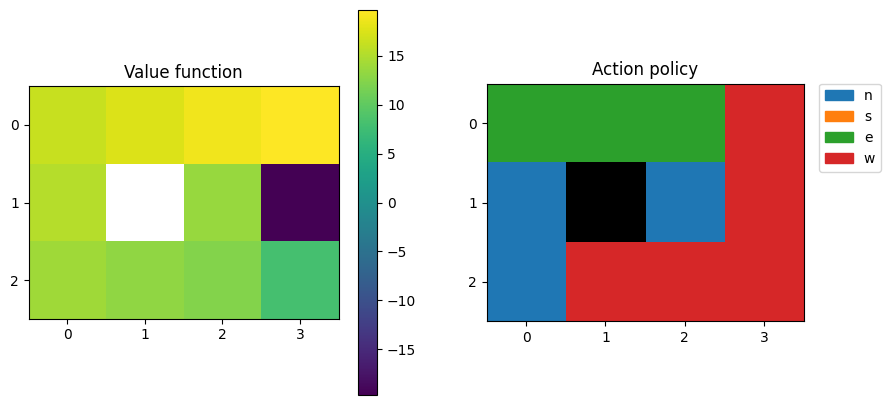

In [7]:
vf.plot()

## Checking for better pruning

In [8]:
len(vf)

55

In [9]:
pruned_vf = vf.prune(level=4)

[ 14.11826785  16.31649596  18.69177694  19.66969251  13.01179732
 -12.92183986 -19.66969251  10.45977309  11.10457637   8.25695696
   4.76564089]
 -> Dominated

[ 15.41950554  15.66750889  17.67233484  19.66969251  15.21294158
  10.93688397 -19.66969251  13.31733708   9.94110383  -8.25865735
 -14.19316731]
 -> Dominated

[ 15.46131005  17.50074029  18.79783742  19.66969251  13.01179732
 -13.15620494 -19.66969251   8.92702633   7.99798523   8.06536362
   4.76564089]
 -> Dominated



In [10]:
len(pruned_vf)

52

## Agent simulation

In [11]:
a = Agent(model)
a.value_function = vf

In [12]:
sim_history = a.simulate()

  0%|          | 3/1000 [00:00<00:00, 1022.75it/s]


In [13]:
sim_history.save_simulation_video()

Video saved at 'Sim Videos/s11-a4-20230913_012527.mp4'...


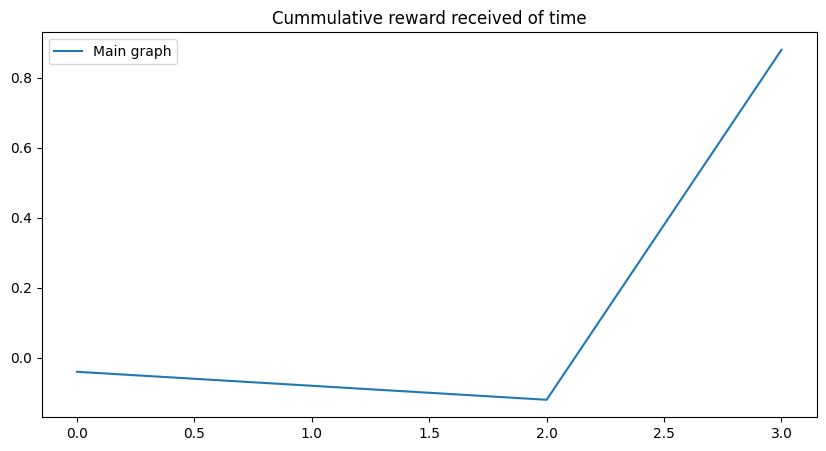

In [14]:
sim_history.rewards.plot('total')

In [15]:
rewards = a.run_n_simulations()

100%|██████████| 1000/1000 [00:01<00:00, 734.44it/s]


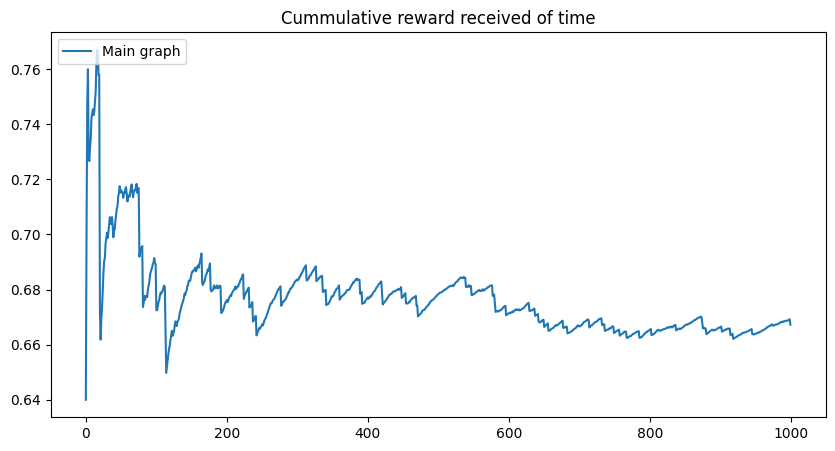

In [16]:
rewards.plot('ma')